<h1>Module 1: Importing Libraries</h1>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="whitegrid")


<h1>Module 2: Loading and Inspecting the Dataset</h1>

In [14]:
fileurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
df = pd.read_csv(fileurl)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
# Drop non-informative columns
df.drop(columns=['id', 'Unnamed: 0'], errors='ignore', inplace=True)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (21613, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h1>Module 3: Data Cleaning and Imputation</h1>

In [17]:
# Check missing values
print(df.isnull().sum())

# Impute using median (more robust than mean)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)


date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


C:\Users\Amar Khaggah\AppData\Local\Temp\ipykernel_14148\2753593065.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
C:\Users\Amar Khaggah\AppData\Local\Temp\ipykernel_14148\2753593065.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [9]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<h1> Module 4: Exploratory Data Analysis </h1>

C:\Users\Amar Khaggah\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


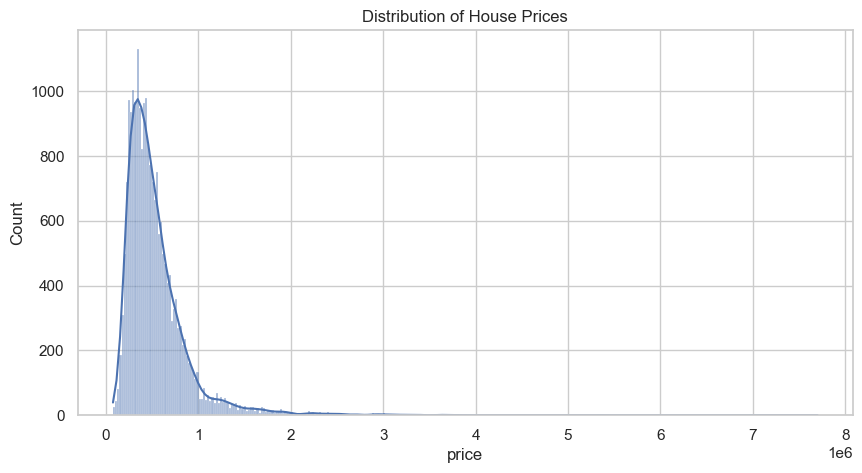

In [18]:
# Distribution of target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

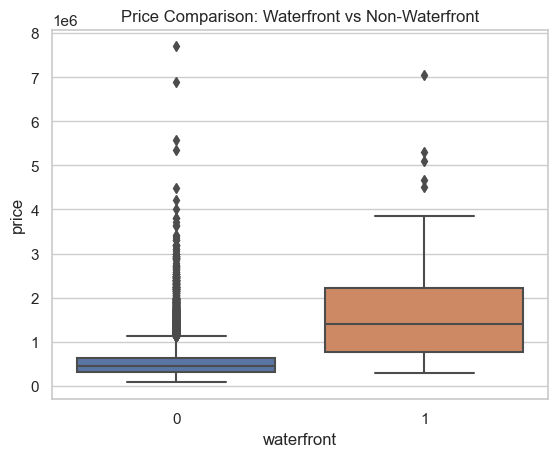

In [20]:
# Price vs Waterfront
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Comparison: Waterfront vs Non-Waterfront')
plt.show()

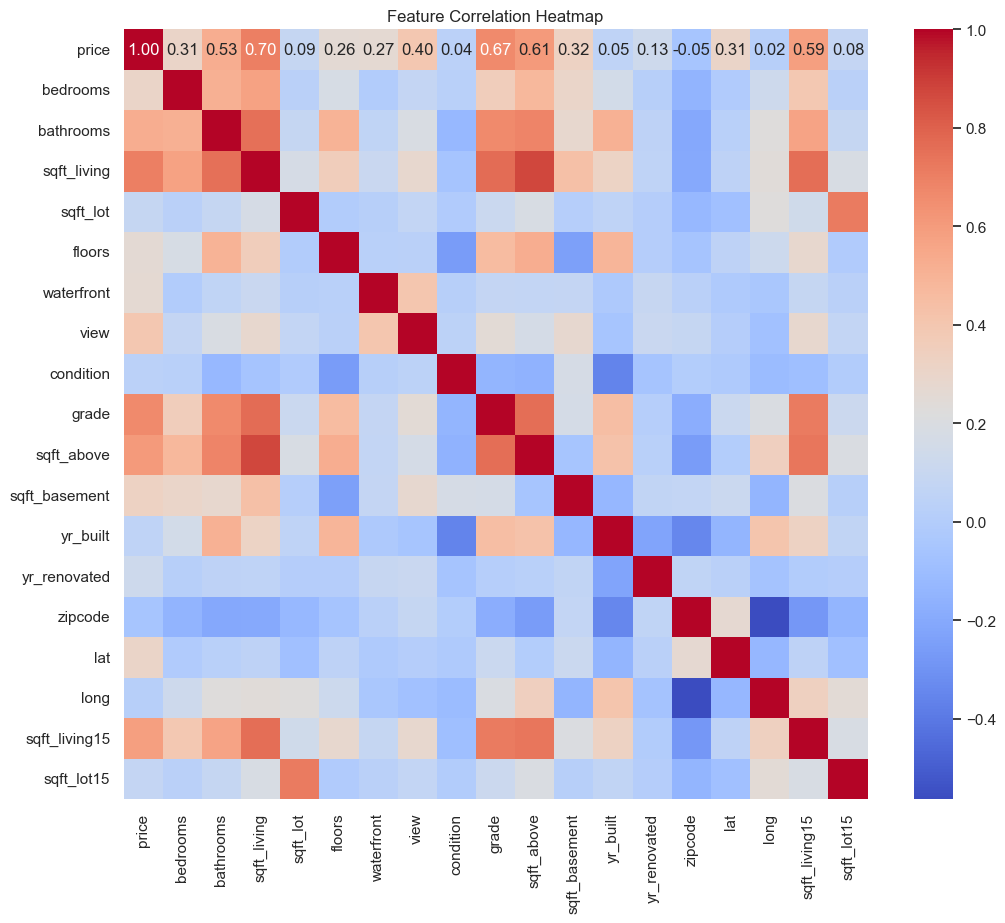

In [21]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

<h1>Module 5: Feature Selection - VIF Check</h1>

In [22]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X_vif = df[features]

In [23]:
X_vif_const = sm.add_constant(X_vif)

# Calculate VIF
vif = pd.DataFrame()
vif["feature"] = X_vif_const.columns
vif["VIF"] = [variance_inflation_factor(X_vif_const.values, i)
              for i in range(X_vif_const.shape[1])]
vif

C:\Users\Amar Khaggah\anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,1.227568e+05
1,floors,1.844734e+00
2,waterfront,1.199124e+00
3,lat,1.048488e+00
4,bedrooms,1.621199e+00
5,sqft_basement,inf
6,view,1.376085e+00
7,bathrooms,2.940053e+00
8,sqft_living15,2.782281e+00
9,sqft_above,inf


In [24]:
# Drop multicollinear feature: sqft_above (highly correlated with sqft_living)
features.remove("sqft_above")

<h1>Module 6: Train-Test Split</h1>

In [29]:
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 18371
Testing samples: 3242


<h1>Module 7: Linear Regression (Simple Pipeline)</h1>

In [30]:
pipe_lr = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

print("Linear Regression R²:", round(r2_score(y_test, y_pred_lr), 3))

Linear Regression R²: 0.648


<h1>Module 8: Ridge Regression</h1>

In [31]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression R²:", round(r2_score(y_test, y_pred_ridge), 3))

Ridge Regression R²: 0.648


<h1>Module 9: Polynomial Regression with Ridge (degree=2)</h1>

In [32]:
poly_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])

poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

print("Polynomial Ridge (deg=2) R²:", round(r2_score(y_test, y_pred_poly), 3))

Polynomial Ridge (deg=2) R²: 0.712


In [33]:
baseline_pred = [y_train.mean()] * len(y_test)
baseline_r2 = r2_score(y_test, baseline_pred)
print("Baseline R² (predicting training mean):", round(baseline_r2, 3))

Baseline R² (predicting training mean): -0.0


<h1>Module 10: Learning Curve to Check for Overfitting</h1>

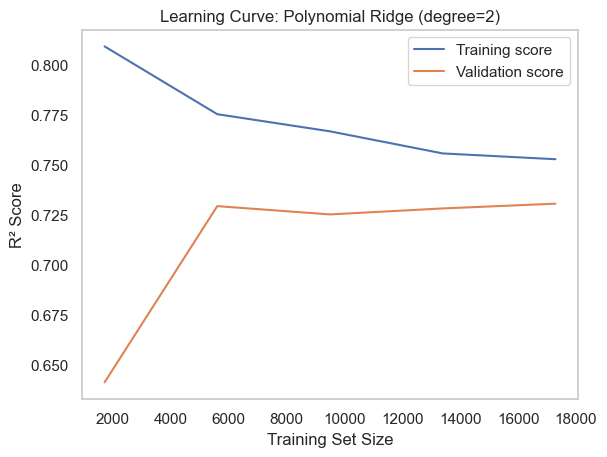

In [34]:
train_sizes, train_scores, test_scores = learning_curve(
    poly_pipe, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5), random_state=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve: Polynomial Ridge (degree=2)")
plt.legend()
plt.grid()
plt.show()